In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [36]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score

diabetes = datasets.load_diabetes()
feature_names = diabetes.feature_names
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression(penalty='l2', C=1000, random_state=3, solver="saga")
regression_model.fit(x_train, y_train)

y_pred = regression_model.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
print("MSE:", mse_test)

MSE: 3332.505617977528


c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GLOBAL INTERPRETATION

Feature Information:
- age     age in years
- sex
- bmi     body mass index 
- bp      average blood pressure
- s1      tc, total serum cholesterol
- s2      ldl, low-density lipoproteins
- s3      hdl, high-density lipoproteins
- s4      tch, total cholesterol / HDL
- s5      ltg, possibly log of serum triglycerides level
- s6      glu, blood sugar level

Number of features: 10


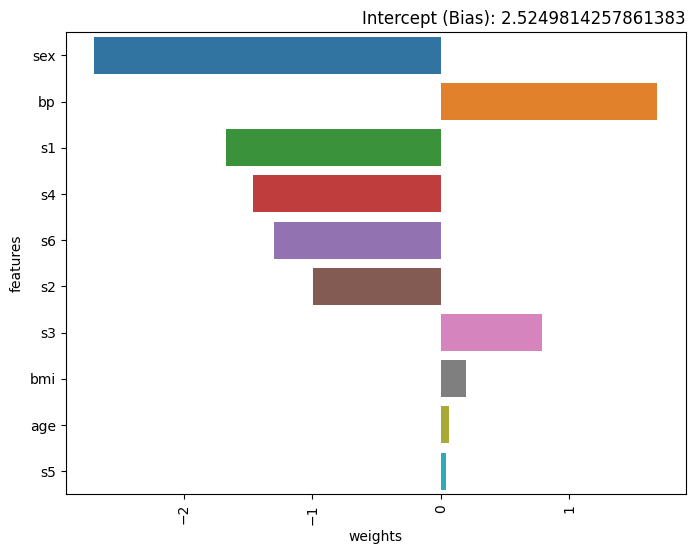

In [39]:
weights = regression_model.coef_
model_weights = pd.DataFrame({ 'features': feature_names,'weights': weights[0]})
model_weights = model_weights.reindex(model_weights['weights'].abs().sort_values(ascending=False).index) 
model_weights = model_weights[(model_weights["weights"] != 0)]    
print("Number of features:",len(model_weights.values))
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x="weights", y="features", data=model_weights)
plt.title("Intercept (Bias): "+str(regression_model.intercept_[0]),loc='right')
plt.xticks(rotation=90)
plt.show()


Based on the plotted feature importance, it is evident that the gender feature holds the most significance. This conclusion is drawn from observing the highest absolute value of the coefficient assigned to this feature among all the features. In the context of the model and dataset, a negative coefficient for gender suggests that having a gender value of 1 is associated with a decrease in the diabetes risk compared to being the oposite gender.

Local interpretation

In [40]:
from IPython.display import SVG
from IPython.display import display                               
from ipywidgets import interactive

def plot_sensor(instance=0):
  random_instance = x_test[instance]

  weights = regression_model.coef_
  summation = sum(weights[0]*random_instance)
  bias = regression_model.intercept_[0]
  res = ""
  if (summation + bias > 0):
    res = " > 0 -> 1"
  else:
    res = " <= 0 -> 0"
  print("Sum(weights*instance): "+str(summation)+" + Intercept (Bias): "+str(bias)+" = "+ str(summation+bias)+ res)
  model_weights = pd.DataFrame({ 'features': list(feature_names),'weights*values': list(weights[0]*random_instance)})
  model_weights = model_weights.reindex(model_weights['weights*values'].abs().sort_values(ascending=False).index) #Sort by absolute value
  model_weights = model_weights[(model_weights["weights*values"] != 0)]    
  print("Number of features:",len(model_weights.values))
  plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
  sns.barplot(x="weights*values", y="features", data=model_weights)
  plt.xticks(rotation=90)
  plt.show()

inter=interactive(plot_sensor, instance=(0,9))
display(inter)

interactive(children=(IntSlider(value=0, description='instance', max=9), Output()), _dom_classes=('widget-inte…

In the global interpretation of the model, it was observed that the gender feature had the most significant influence overall. This statement is verified by considering the local interpretation for individual instances. Specifically, it was found that six out of the 10 instances assigned the highest weight to the sex feature. For the first instance (instance 0), the local interpretation reveals that most features have negative weights, indicating a negative correlation with the target variable. Additionally, the diagram suggests that the total serum cholesterol feature has the most significant influence, followed by the low-density lipoproteins and blood sugar level features.

Black Box

In [41]:
from sklearn.svm import SVR

regressorSVR = SVR(kernel='rbf', C=26.0)

regressorSVR.fit(x_train, y_train)

y_pred = regressorSVR.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 2413.5179109448727


In [42]:
new_x_train = x_train
new_y_train = regressorSVR.predict(x_train)

Global interpretation 

MSE: 2862.7203309185434
Number of features: 10


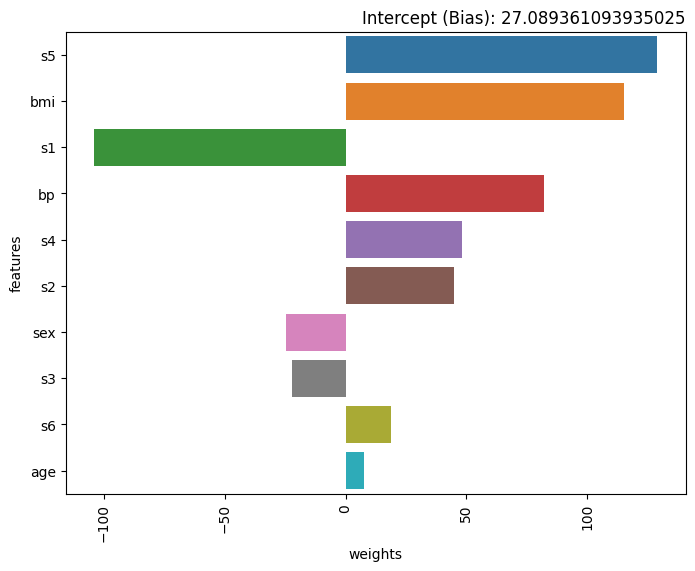

In [46]:
from sklearn.linear_model import LinearRegression

lin_model =  LinearRegression()

lin_model.fit(new_x_train, new_y_train)

y_pred = lin_model.predict(x_test)

mse_test = mean_squared_error(y_test, y_pred)
print("MSE:", mse_test)

intercept = lin_model.intercept_

weights = lin_model.coef_
model_weights = pd.DataFrame({ 'features': feature_names,'weights': weights})
model_weights = model_weights.reindex(model_weights['weights'].abs().sort_values(ascending=False).index) 
model_weights = model_weights[(model_weights["weights"] != 0)]    

print("Number of features:",len(model_weights.values))
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x="weights", y="features", data=model_weights)
plt.title("Intercept (Bias): "+str(intercept),loc='right')
plt.xticks(rotation=90)
plt.show()

Based on the plotted feature importance, it is evident that the Log of serum triglycerides level feature holds the most significance. This conclusion is drawn from observing the highest absolute value of the coefficient assigned to this feature among all the features. In the context of the model and dataset, the positive coefficients associated with most features indicate that higher values of these features tend to correspond to higher predicted values of the target variable. This suggests a positive relationship between these features and the target variable meaning that these features are associated with an increase in the diabetes risk. Furthermore, the weights associated with features s5, bmi, and s1 have an absolute value close to 100. This suggests a strong connection between these features and the target variable. The high magnitude of these weights indicates that changes in s5, bmi, and s1 have a significant influence on the predicted outcome.

Local interpretation

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

knnmodel = KNeighborsRegressor(n_neighbors=89, weights="distance", metric="minkowski", p=2)
knnmodel = knnmodel.fit(new_x_train, new_y_train)

test_x = [x_test[0]]
ys = knnmodel.kneighbors(test_x, n_neighbors=89, return_distance=False)
new_x_train2 = []
new_y_train2 = []
for i in ys[0]:
    new_x_train2.append(new_x_train[i])
    new_y_train2.append(new_y_train[i])

In [48]:
lin_model = LinearRegression()
lin_model.fit(new_x_train2, new_y_train2)
predicted_train = lin_model.predict(new_x_train2)
predicted_test = lin_model.predict(x_test)
predicted_mse_test = mean_squared_error(y_test, predicted_test)

target_names = diabetes.target

from IPython.display import SVG
from IPython.display import display                               
from sklearn.metrics import accuracy_score

def plot_sensor(instance=0):
  random_instance = x_test[instance]

  print(f"Original Class: {target_names[int(y_test[instance])]}, Predicted Class: {target_names[int(predicted_test[instance])]}")
  weights = lin_model.coef_
  summation = sum(weights*random_instance)
  bias = lin_model.intercept_
  res = ""
  if (summation + bias > 0):
    res = " > 0 -> 1"
  else:
    res = " <= 0 -> 0"
  print(f"Sum(weights*instance): {str(summation)} Intercept (Bias): {str(bias)} {str(summation+bias)+ res}")
  model_weights = pd.DataFrame({ 'features': list(feature_names),'weights*values': list(weights*random_instance)})
  model_weights = model_weights.reindex(model_weights['weights*values'].abs().sort_values(ascending=False).index) 
  model_weights = model_weights[(model_weights["weights*values"] != 0)]    
  print("Number of features:",len(model_weights.values))
  plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
  sns.barplot(x="weights*values", y="features", data=model_weights)
  plt.xticks(rotation=90)
  plt.show()
inter=interactive(plot_sensor 
   , instance=(0,9))
display(inter)

interactive(children=(IntSlider(value=0, description='instance', max=9), Output()), _dom_classes=('widget-inte…

In the global interpretation of the model, it was observed that the s5 feature had the most significant influence overall. However, this statement is not verified by considering the local interpretation for individual instances. Specifically, it was found that 7 out of the 10 instances assigned the highest weight to s1 sex feature. For the fifth instance (instance 5), the local interpretation reveals that most contributed features have positive weights, indicating a positive correlation with the target variable. Additionally, the diagram suggests that the total serum cholesterol feature has the most significant influence, followed by the low-density lipoproteins and possibly log of serum triglycerides level features. Additionally, the plot reveals that both the sex and s4 features have negligible contributions to the predictions. This is evident from the weights assigned to these features, which are exactly 0. Consequently, these features do not play a significant role in determining the predicted outcome.